In [51]:
import pandas as pd
import numpy as py
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default = "plotly_white"

In [52]:
df = pd.read_csv("retail_sales_dataset.csv", encoding = 'latin-1')

df.head()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


# Change Datatypes

In [54]:
df["Date"] = pd.to_datetime(df["Date"])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [56]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


# Column Create

In [57]:
df["Order Month"] = df["Date"].dt.month

In [58]:
df["Order Year"] = df["Date"].dt.year

In [59]:
bins = [17, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)


In [60]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Order Month,Order Year,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,2023,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,2023,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,2023,46-55
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,2023,36-45
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,2023,26-35


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Order Month       1000 non-null   int32         
 10  Order Year        1000 non-null   int32         
 11  Age Group         1000 non-null   category      
dtypes: category(1), datetime64[ns](1), int32(2), int64(5), object(3)
memory usage: 79.4+ KB


In [62]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount,Order Month,Order Year
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000,6.549000,2023.002000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000,1.000000,2023.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000,4.000000,2023.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000,6.000000,2023.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000,10.000000,2023.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000,12.000000,2024.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632,3.452755,0.044699


In [63]:
df.describe(include=['object'])

,Customer ID,Gender,Product Category
count,1000,1000,1000
unique,1000,2,3
top,CUST1000,Female,Clothing
freq,1,510,351


In [64]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Order Month,Order Year,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,2023,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,2023,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,2023,46-55
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,2023,36-45
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,2023,26-35


# Monthly Sales Analysis

In [65]:
sales_by_month = df.groupby("Order Month")["Total Amount"].sum().reset_index()
sales_by_month


,Order Month,Total Amount
0,1,36980
1,2,44060
2,3,28990
3,4,33870
4,5,53150
5,6,36715
6,7,35465
7,8,36960
8,9,23620
9,10,46580


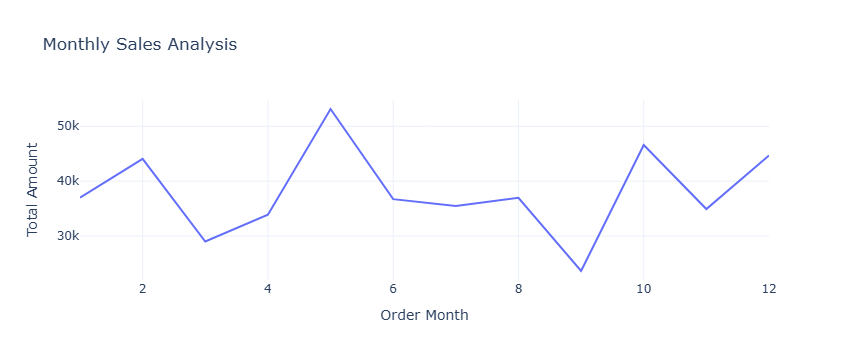

In [66]:
fig = px.line(sales_by_month,
              x = 'Order Month',
              y = 'Total Amount',
              title = 'Monthly Sales Analysis')
fig.show()
              


# Total Sales by Gender

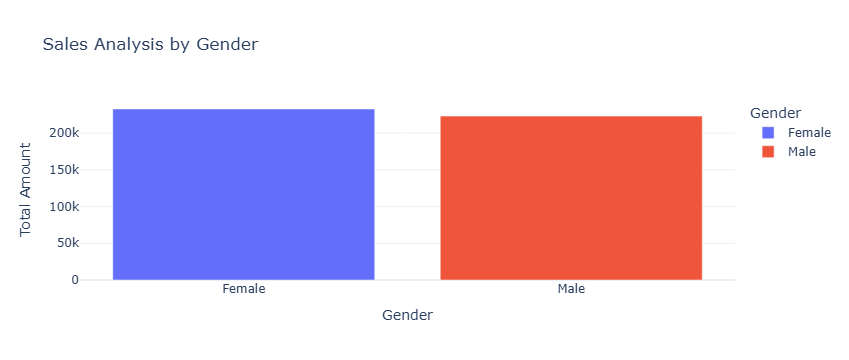

In [67]:
sales_by_gender = df.groupby("Gender")["Total Amount"].sum().reset_index()
fig = px.bar(sales_by_gender,
              x = 'Gender',
              y = 'Total Amount',
              color = 'Gender',
              title = 'Sales Analysis by Gender')
fig.show()

In [68]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Order Month,Order Year,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,2023,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,2023,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,2023,46-55
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,2023,36-45
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,2023,26-35


# Total Sales by Product Category

In [69]:
sales_by_category = df.groupby('Product Category')['Total Amount'].sum().reset_index()
sales_by_category

,Product Category,Total Amount
0,Beauty,143515
1,Clothing,155580
2,Electronics,156905


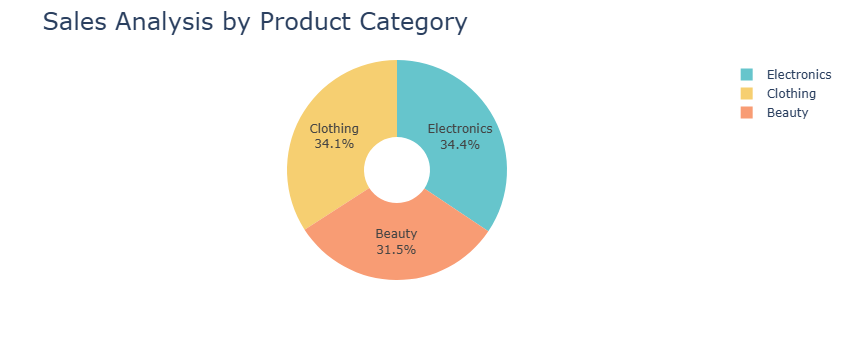

In [70]:
fig = px.pie(sales_by_category,
             values = 'Total Amount',
             names = 'Product Category',
             hole = 0.3,
             color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.update_layout(title_text = 'Sales Analysis by Product Category',
                  title_font = dict(size = 24))

# Sales Analysis by Age Group

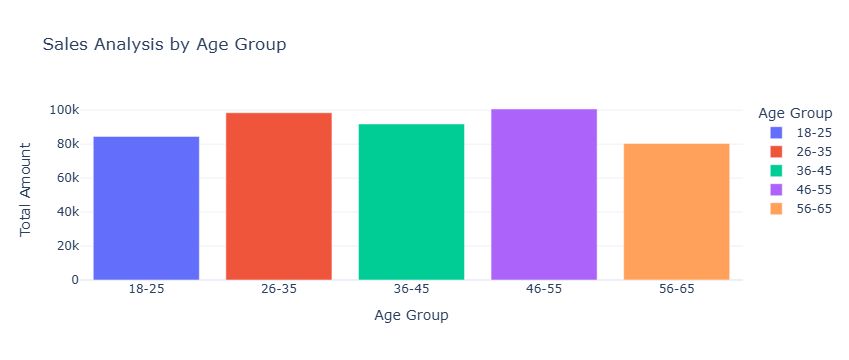

In [74]:
sales_by_age_group = df.groupby("Age Group", observed = True)["Total Amount"].sum().reset_index()
fig = px.bar(sales_by_age_group,
              x = 'Age Group',
              y = 'Total Amount',
              color = 'Age Group',
              title = 'Sales Analysis by Age Group')
fig.show()

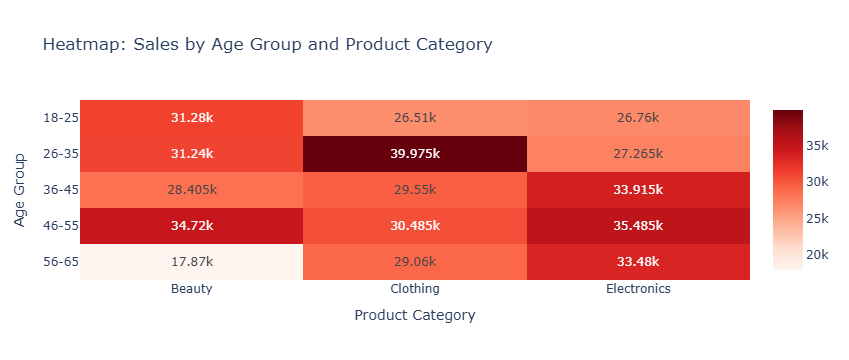

In [75]:
heatmap_data = df.pivot_table(
    index='Age Group', 
    columns='Product Category', 
    values='Total Amount', 
    aggfunc='sum',
    observed=True 
)
fig = px.imshow(
    heatmap_data, 
    title='Heatmap: Sales by Age Group and Product Category',
    text_auto=True,  # Yeh numbers ko har cell mein dikhayega
    aspect="auto",   # Plot ko responsive rakhta hai
    color_continuous_scale='Reds' # Color scheme
)
fig.update_xaxes(title_text='Product Category')
fig.update_yaxes(title_text='Age Group')

fig.show()
